**Importing dependecies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the dataframe into pandas dataframe**

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

**droping the column id**

In [ ]:
data.drop("customerID",axis=1,inplace=True)

**checking the datatype**

In [ ]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


**to see the values of specific columns**

In [ ]:
data["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**changing the object datatype into float**

In [ ]:
data["TotalCharges"]= pd.to_numeric(data["TotalCharges"],errors="coerce")

In [ ]:
data["TotalCharges"].dtype

dtype('float64')

In [ ]:
data["TotalCharges"].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

**to check how many null values are there**

In [ ]:
data["TotalCharges"].isnull().sum()

np.int64(11)

**Removing the null values in the tatal charges column**

In [ ]:
data = data[data["TotalCharges"].notnull()]

In [ ]:
data.shape

(7032, 20)

In [ ]:
tenure_churn_yes = data[data.Churn=="Yes"].tenure
tenure_churn_no = data[data.Churn=="No"].tenure

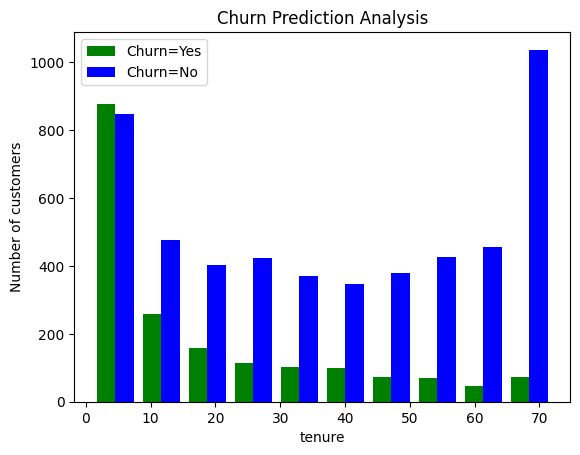

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],label=["Churn=Yes","Churn=No"],color=["green","blue"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Churn Prediction Analysis")
plt.legend()
plt.show()

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=="object":
      print(f"{column}:  {df[column].unique()}")

In [ ]:
print_unique_col_values(data)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


**Replacing the columns value with different name but the same me**aning

In [ ]:
data.replace("No internet service","No",inplace=True)
data.replace("No phone service","No",inplace=True)

In [ ]:
print_unique_col_values(data)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


**encoding the categorical values in to numbers so that our model will train well**

In [ ]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

In [ ]:
for col in yes_no_columns:
  data[col] = data[col].replace({"Yes":1,"No":0})
  print(f"{col} : {data[col].unique()}")

Partner : [1 0]
Dependents : [0 1]


/tmp/ipython-input-1852904658.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({"Yes":1,"No":0})


PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
Churn : [0 1]


In [ ]:

data['gender'] = data['gender'].replace({'Female':1,'Male':0})

/tmp/ipython-input-666907689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Female':1,'Male':0})


In [ ]:
data['gender'].unique()

array([1, 0])

**OneHot encoding**

In [ ]:
data = pd.get_dummies(data = data , columns = ["InternetService","Contract","PaymentMethod"])

**Scaling values with highest**

In [ ]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2037,1,1,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
8,1,0,1,0,0.380282,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3550,0,0,0,0,0.436620,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop("Churn",axis=1)
y=data["Churn"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)


**ANN building and training model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])


model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5216 - loss: 0.6977
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7816 - loss: 0.4557
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4267
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.4082
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8058 - loss: 0.4150
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4135
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8097 - loss: 0.3999
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8128 - loss: 0.4071
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8080 - loss: 0.4053
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.3982
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8090 - loss: 0.4086
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

**Evaluating the model on test data**

In [ ]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 0.4596


[0.4805380403995514, 0.764747679233551]

In [ ]:
y_prediction = model.predict(X_test)
y_prediction[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.17898531],
       [0.626248  ],
       [0.03196986],
       [0.87283283],
       [0.38249323],
       [0.8938298 ],
       [0.09997036],
       [0.31767935],
       [0.34798378],
       [0.12720807]], dtype=float32)

In [ ]:
y_pre = []
for element in y_prediction:
  if element > 0.5:
    y_pre.append(1)
  else:
    y_pre.append(0)

In [ ]:
y_pre[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

**classification report**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
print(classification_report(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.53      0.57       408

    accuracy                           0.76      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



**Confusion Matrix of the actual and predicted**

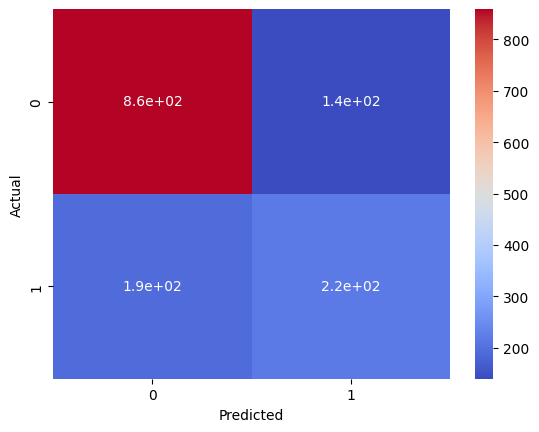

In [ ]:
cm = confusion_matrix(y_test,y_pre)
sns.heatmap(cm,annot=True,cmap = "coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()